In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/halim-vai-data/halim vai dataset.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]
df

,DateTime,Cross 1
0,2023-09-18 06:00:00,105.0
1,2023-09-18 06:05:00,97.0
2,2023-09-18 06:10:00,76.0
3,2023-09-18 06:15:00,98.0
4,2023-09-18 06:20:00,87.0
...,...,...
16123,2023-11-13 05:35:00,85.0
16124,2023-11-13 05:40:00,71.0
16125,2023-11-13 05:45:00,83.0
16126,2023-11-13 05:50:00,89.0


Support Vector Regression (SVR) Time Series Forecasting:
MAE: 15.579149642774619
MSE: 423.2416057201729
RMSE: 20.572836598781727
R-squared (R^2): 0.93


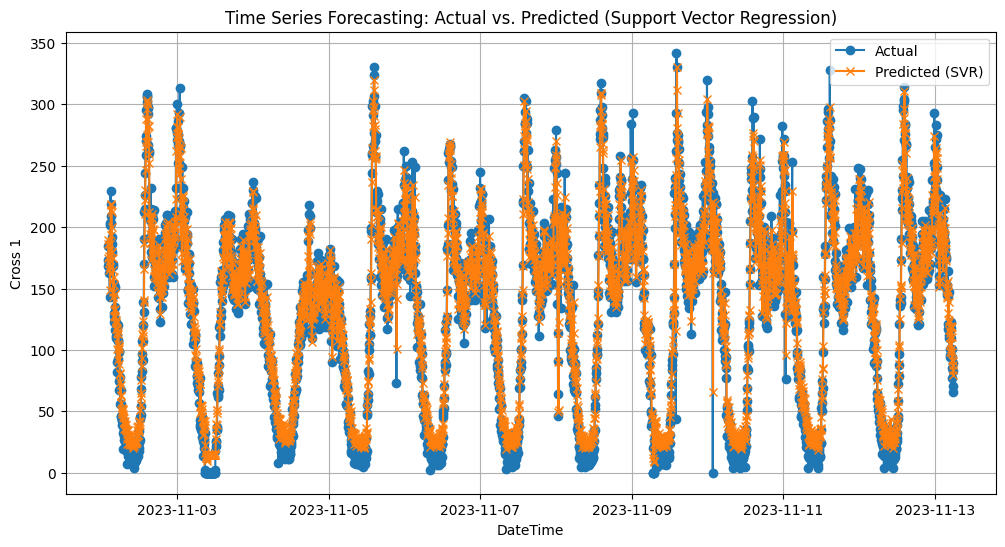

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for SVR
sequence_length = 10  # Adjust as needed

X_train, y_train_sequences = [], []

for i in range(len(y_train_scaled) - sequence_length):
    X_train.append(y_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train = np.array(X_train)
y_train_sequences = np.array(y_train_sequences)

# Flatten the sequences for SVR
X_train_flatten = X_train.reshape(-1, sequence_length)
y_train_flatten = y_train_sequences.flatten()

# Create and train the SVR model
model_svr = SVR(kernel='linear')
model_svr.fit(X_train_flatten, y_train_flatten)

# Prepare the test data
X_test = np.array(test_data['Cross 1'])  # Use the actual values as input

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Flatten the sequences for prediction
X_test_flatten = X_test_sequences.reshape(-1, sequence_length)

# Make predictions
y_pred_scaled = model_svr.predict(X_test_flatten)

# Reshape the predictions to match the shape of the original data
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_svr = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_svr = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_svr = np.sqrt(mse_svr)
r_squared_svr = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("Support Vector Regression (SVR) Time Series Forecasting:")
print(f'MAE: {mae_svr}')
print(f'MSE: {mse_svr}')
print(f'RMSE: {rmse_svr}')
print(f'R-squared (R^2): {r_squared_svr:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (SVR)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (Support Vector Regression)')
plt.grid(True)
plt.show()


Random Forest Regression Time Series Forecasting:
MAE: 13.258795027589228
MSE: 393.0984785031034
RMSE: 19.82671123769909
R-squared (R^2): 0.94


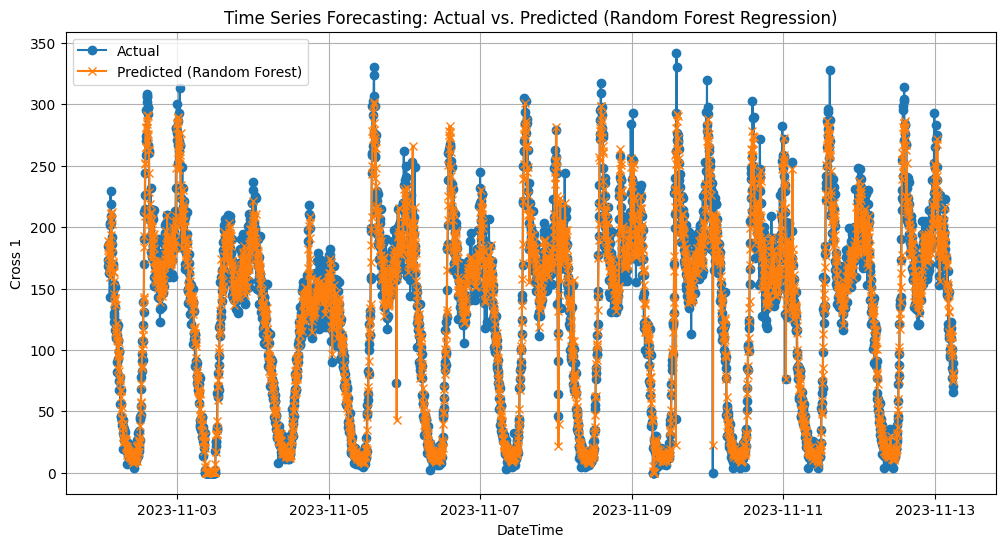

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for random forest regression
sequence_length = 10  # Adjust as needed

X_train, y_train_sequences = [], []

for i in range(len(y_train_scaled) - sequence_length):
    X_train.append(y_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train = np.array(X_train)
y_train_sequences = np.array(y_train_sequences)

# Flatten the sequences for random forest regression
X_train_flatten = X_train.reshape(-1, sequence_length)
y_train_flatten = y_train_sequences.flatten()

# Create and train the random forest regression model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_flatten, y_train_flatten)

# Prepare the test data
X_test = np.array(test_data['Cross 1'])  # Use the actual values as input

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Flatten the sequences for prediction
X_test_flatten = X_test_sequences.reshape(-1, sequence_length)

# Make predictions
y_pred_scaled = model_rf.predict(X_test_flatten)

# Reshape the predictions to match the shape of the original data
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_rf = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_rf = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("Random Forest Regression Time Series Forecasting:")
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared (R^2): {r_squared_rf:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (Random Forest)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (Random Forest Regression)')
plt.grid(True)
plt.show()


Linear Regression Time Series Forecasting:
MAE: 13.611478015689832
MSE: 382.23657098152563
RMSE: 19.550871361183
R-squared (R^2): 0.94


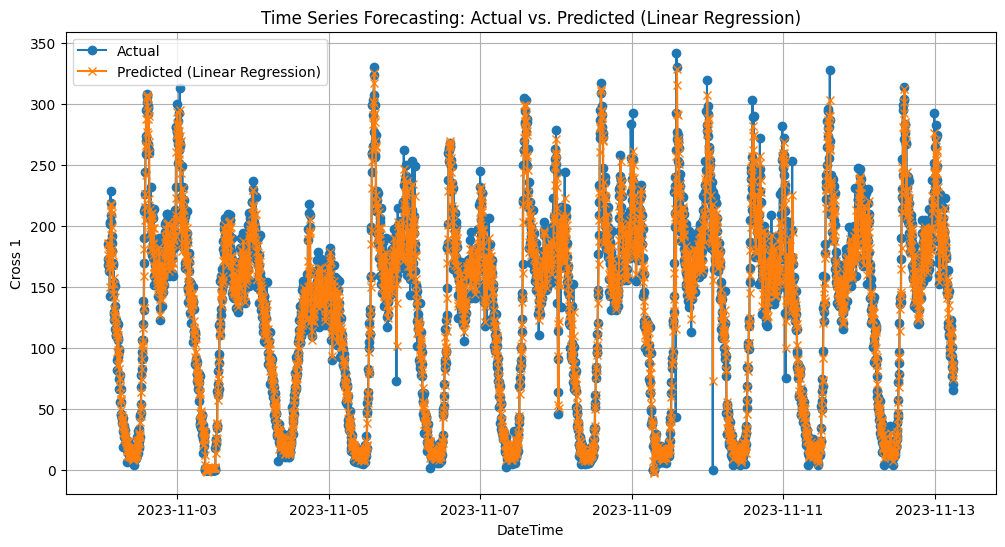

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for linear regression
sequence_length = 10  # Adjust as needed

X_train, y_train_sequences = [], []

for i in range(len(y_train_scaled) - sequence_length):
    X_train.append(y_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train = np.array(X_train)
y_train_sequences = np.array(y_train_sequences)

# Flatten the sequences for linear regression
X_train_flatten = X_train.reshape(-1, sequence_length)
y_train_flatten = y_train_sequences.flatten()

# Create and train the linear regression model
model_linear = LinearRegression()
model_linear.fit(X_train_flatten, y_train_flatten)

# Prepare the test data
X_test = np.array(test_data['Cross 1'])  # Use the actual values as input

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Flatten the sequences for prediction
X_test_flatten = X_test_sequences.reshape(-1, sequence_length)

# Make predictions
y_pred_scaled = model_linear.predict(X_test_flatten)

# Reshape the predictions to match the shape of the original data
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_linear = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_linear = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_linear = np.sqrt(mse_linear)
r_squared_linear = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("Linear Regression Time Series Forecasting:")
print(f'MAE: {mae_linear}')
print(f'MSE: {mse_linear}')
print(f'RMSE: {rmse_linear}')
print(f'R-squared (R^2): {r_squared_linear:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (Linear Regression)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (Linear Regression)')
plt.grid(True)
plt.show()


Epoch 1/50
403/403 [==============================] - 6s 8ms/step - loss: 0.0052
Epoch 2/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0024
Epoch 3/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 4/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 5/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 6/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 7/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 8/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 9/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 10/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 11/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0022
Epoch 12/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0022
Epoch 13/50
403/403 [====

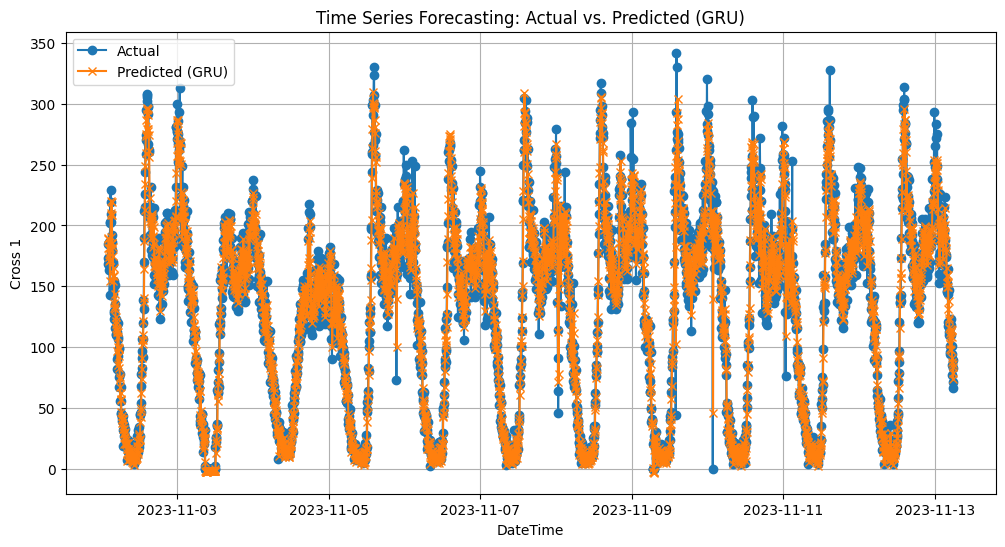

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]

# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for the GRU model
sequence_length = 10  # Adjust as needed

X_train, y_train_sequences = [], []

for i in range(len(y_train_scaled) - sequence_length):
    X_train.append(y_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train = np.array(X_train)
y_train_sequences = np.array(y_train_sequences)

# Build the GRU model
model_gru = Sequential([
    GRU(50, input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the GRU model
model_gru.fit(X_train, y_train_sequences, epochs=50, batch_size=32, verbose=1)

# Prepare the test data
X_test = np.array(test_data['Cross 1'])  # Use the actual values as input

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Make predictions
y_pred_scaled = model_gru.predict(X_test_sequences)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_gru = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_gru = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_gru = np.sqrt(mse_gru)
r_squared_gru = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("GRU Time Series Forecasting:")
print(f'MAE: {mae_gru}')
print(f'MSE: {mse_gru}')
print(f'RMSE: {rmse_gru}')
print(f'R-squared (R^2): {r_squared_gru:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (GRU)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (GRU)')
plt.grid(True)
plt.show()


Epoch 1/50
403/403 [==============================] - 6s 8ms/step - loss: 0.0056
Epoch 2/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0027
Epoch 3/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0025
Epoch 4/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0024
Epoch 5/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 6/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 7/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 8/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 9/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 10/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 11/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0023
Epoch 12/50
403/403 [==============================] - 3s 8ms/step - loss: 0.0022
Epoch 13/50
403/403 [====

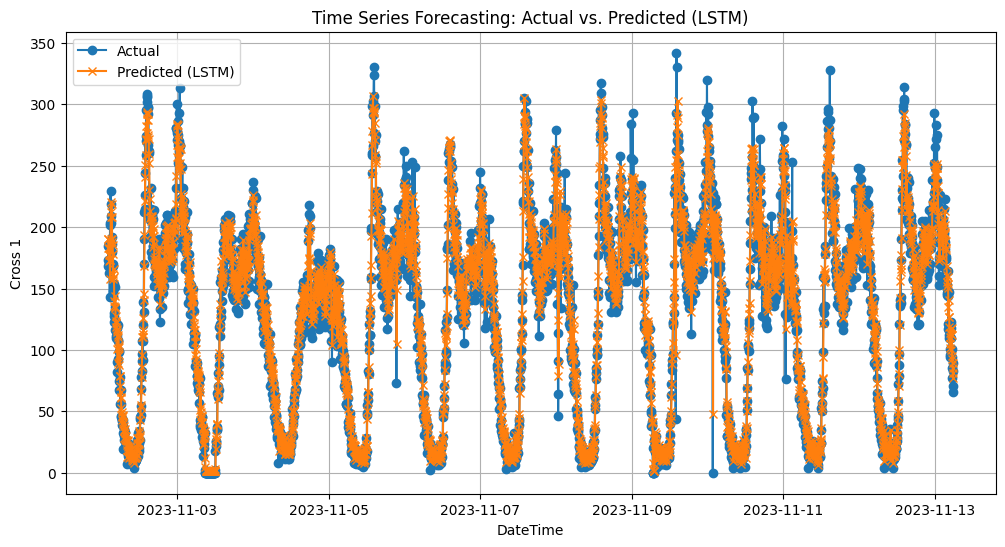

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]
# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1'].values
scaler = MinMaxScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for the LSTM model
sequence_length = 10  # Adjust as needed

X_train, y_train_sequences = [], []

for i in range(len(y_train_scaled) - sequence_length):
    X_train.append(y_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train = np.array(X_train)
y_train_sequences = np.array(y_train_sequences)

# Build the LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(sequence_length, 1)),
    Dense(1)
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the LSTM model
model_lstm.fit(X_train, y_train_sequences, epochs=50, batch_size=32, verbose=1)

# Prepare the test data
X_test = np.array(test_data['Cross 1'])  # Use the actual values as input

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test.reshape(-1, 1))

X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Make predictions
y_pred_scaled = model_lstm.predict(X_test_sequences)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_lstm = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_lstm = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_lstm = np.sqrt(mse_lstm)
r_squared_lstm = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("LSTM Time Series Forecasting:")
print(f'MAE: {mae_lstm}')
print(f'MSE: {mse_lstm}')
print(f'RMSE: {rmse_lstm}')
print(f'R-squared (R^2): {r_squared_lstm:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (LSTM)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (LSTM)')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.38701D+00    |proj g|=  7.25404D-02


 This problem is unconstrained.



At iterate    5    f=  4.31795D+00    |proj g|=  3.47850D-02

At iterate   10    f=  4.24036D+00    |proj g|=  6.49651D-03

At iterate   15    f=  4.24030D+00    |proj g|=  5.17555D-04

At iterate   20    f=  4.24024D+00    |proj g|=  4.77008D-03

At iterate   25    f=  4.24019D+00    |proj g|=  3.08994D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     33      1     0     0   4.573D-05   4.240D+00
  F =   4.2401933045269953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMA Time Series Forecasting:
MAE: 84.23843748794765
MSE: 11484.041389376034
RMSE: 107.1636197101238
R-squared (R^2): -0.86


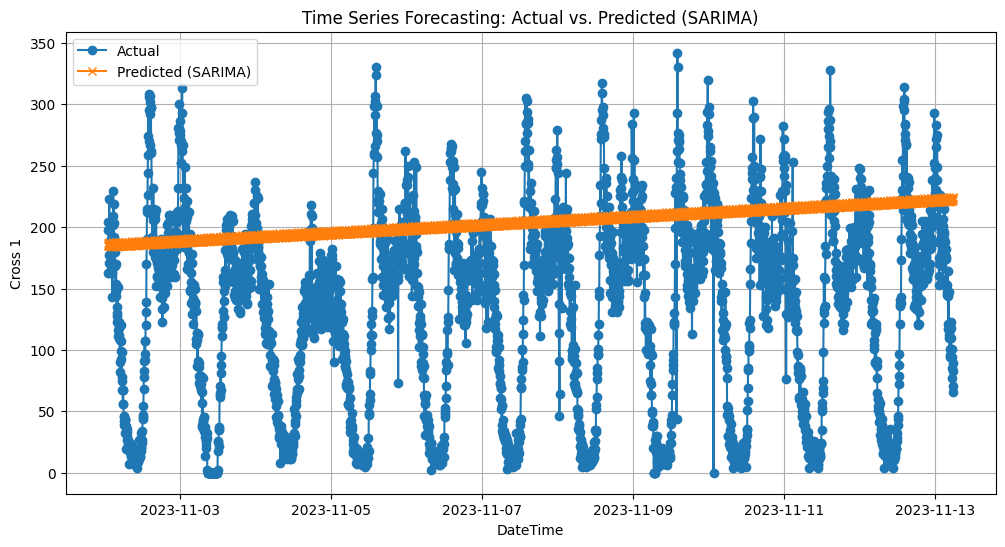

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]

# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
y_train = train_data['Cross 1']

# Create and fit the SARIMA model
order = (1, 1, 1)  # Replace with appropriate order parameters
seasonal_order = (1, 1, 1, 12)  # Replace with appropriate seasonal order parameters

model_sarima = SARIMAX(y_train, order=order, seasonal_order=seasonal_order)
results = model_sarima.fit()

# Make predictions for the test data
start = len(train_data)
end = len(train_data) + len(test_data) - 1
y_pred = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Calculate MAE, MSE, RMSE, and R-squared
mae_sarima = mean_absolute_error(test_data['Cross 1'], y_pred)
mse_sarima = mean_squared_error(test_data['Cross 1'], y_pred)
rmse_sarima = np.sqrt(mse_sarima)
r_squared_sarima = r2_score(test_data['Cross 1'], y_pred)

print("SARIMA Time Series Forecasting:")
print(f'MAE: {mae_sarima}')
print(f'MSE: {mse_sarima}')
print(f'RMSE: {rmse_sarima}')
print(f'R-squared (R^2): {r_squared_sarima:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Cross 1'], label='Actual', marker='o')
plt.plot(test_data.index, y_pred, label='Predicted (SARIMA)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (SARIMA)')
plt.grid(True)
plt.show()


Epoch 1/50
403/403 [==============================] - 10s 14ms/step - loss: 0.0568
Epoch 2/50
403/403 [==============================] - 6s 15ms/step - loss: 0.0561
Epoch 3/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0548
Epoch 4/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0543
Epoch 5/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0538
Epoch 6/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0535
Epoch 7/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0533
Epoch 8/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0530
Epoch 9/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0527
Epoch 10/50
403/403 [==============================] - 6s 15ms/step - loss: 0.0526
Epoch 11/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0525
Epoch 12/50
403/403 [==============================] - 6s 14ms/step - loss: 0.0524
Epoch 13/50


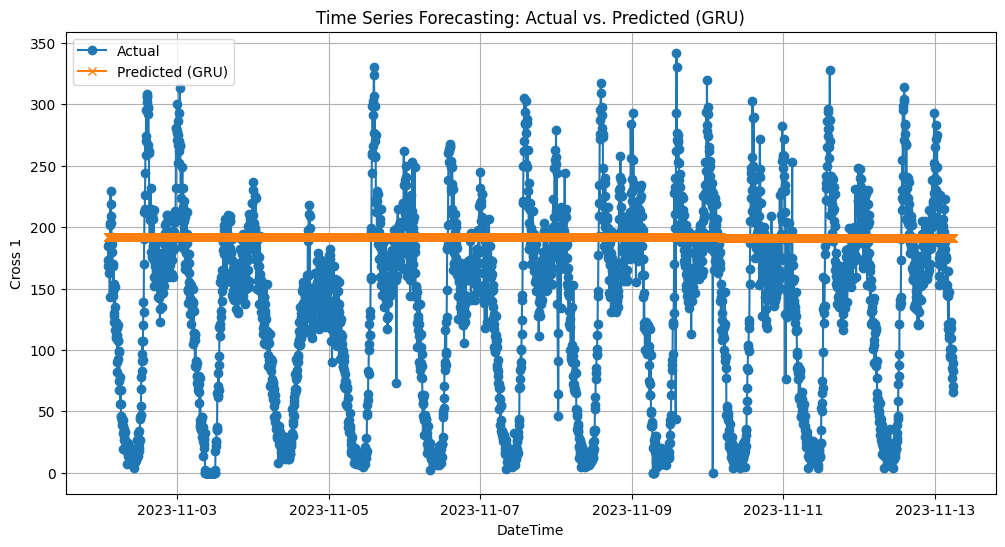

In [13]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]
# Load your dataset (replace 'your_dataset.csv' with your actual file)
# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)  # Time steps
y_train = train_data['Cross 1'].values

# Normalize the data (optional but can help model training)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train.reshape(-1, 1))

# Create sequences for the GRU model
sequence_length = 10  # Adjust as needed
X_train_sequences, y_train_sequences = [], []

for i in range(len(X_train_scaled) - sequence_length):
    X_train_sequences.append(X_train_scaled[i:i+sequence_length])
    y_train_sequences.append(y_train_scaled[i+sequence_length])

X_train_sequences = np.array(X_train_sequences)
y_train_sequences = np.array(y_train_sequences)

# Create and compile the GRU model
model_gru = keras.Sequential([
    keras.layers.GRU(64, input_shape=(sequence_length, 1), return_sequences=True),
    keras.layers.GRU(32),
    keras.layers.Dense(1)
])

model_gru.compile(optimizer='adam', loss='mse')

# Train the GRU model
model_gru.fit(X_train_sequences, y_train_sequences, epochs=50, batch_size=32)

# Prepare the test data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)  # Time steps

# Normalize and create sequences for the test data
X_test_scaled = scaler.transform(X_test)
X_test_sequences = []

for i in range(len(X_test_scaled) - sequence_length):
    X_test_sequences.append(X_test_scaled[i:i+sequence_length])

X_test_sequences = np.array(X_test_sequences)

# Make predictions
y_pred_scaled = model_gru.predict(X_test_sequences)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Calculate MAE, MSE, RMSE, and R-squared
mae_gru = mean_absolute_error(test_data['Cross 1'].values[sequence_length:], y_pred)
mse_gru = mean_squared_error(test_data['Cross 1'].values[sequence_length:], y_pred)
rmse_gru = np.sqrt(mse_gru)
r_squared_gru = r2_score(test_data['Cross 1'].values[sequence_length:], y_pred)

print("GRU Time Series Forecasting:")
print(f'MAE: {mae_gru}')
print(f'MSE: {mse_gru}')
print(f'RMSE: {rmse_gru}')
print(f'R-squared (R^2): {r_squared_gru:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_data['Cross 1'].values[sequence_length:], label='Actual', marker='o')
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted (GRU)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (GRU)')
plt.grid(True)
plt.show()


Random Forest Regression:
MAE: 76.34587724736515
MSE: 9749.800235585864
RMSE: 98.74107673904444
R-squared (R^2): -0.58


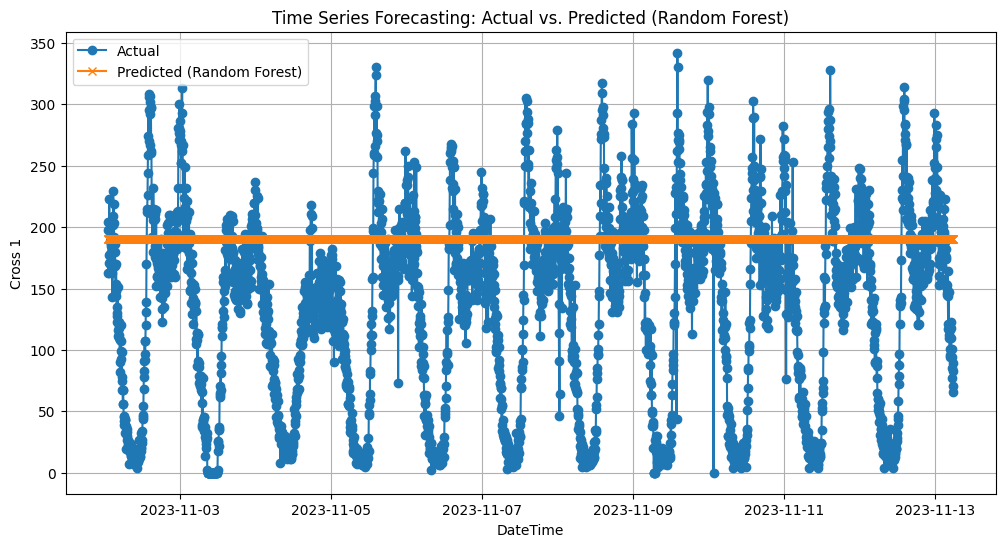

In [16]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]
# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)  # Time steps
y_train = train_data['Cross 1']

# Create and train the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Prepare the test data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)  # Time steps

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Calculate MAE, MSE, RMSE, and R-squared
mae_rf = mean_absolute_error(test_data['Cross 1'], y_pred_rf)
mse_rf = mean_squared_error(test_data['Cross 1'], y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r_squared_rf = r2_score(test_data['Cross 1'], y_pred_rf)

print("Random Forest Regression:")
print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'RMSE: {rmse_rf}')
print(f'R-squared (R^2): {r_squared_rf:.2f}')

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Cross 1'], label='Actual', marker='o')
plt.plot(test_data.index, y_pred_rf, label='Predicted (Random Forest)', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted (Random Forest)')
plt.grid(True)
plt.show()


MAE: 64.52689781082972
MSE: 6349.128373741311
RMSE: 79.68141799529745
R-squared (R^2): -0.03


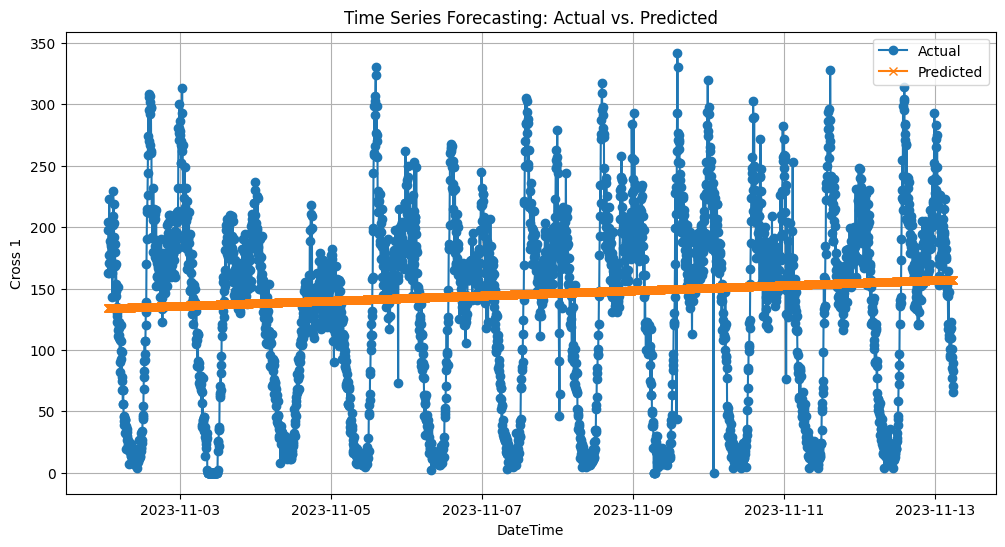

In [25]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with your actual file)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import datetime as dt
df= pd.read_csv("/kaggle/input/halim-vai-data/halim vai dataset.csv")
df = pd.DataFrame(df)
# Define the start date and time
start_date = dt.datetime(2023, 9, 18, 6, 0, 0)
# Create a new column with the date and time values
time_increment = dt.timedelta(minutes=5)
df['DateTime'] = [start_date + i * time_increment for i in range(len(df))]
df = df[['DateTime'] + [col for col in df.columns if col != 'DateTime']]
# Convert 'DateTime' column to datetime data type and set it as the index
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.set_index('DateTime', inplace=True)

# Split the data into training and testing sets (e.g., 80% for training)
train_size = int(0.8 * len(df))
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)  # Time steps
y_train = train_data['Cross 1']

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Prepare the test data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)  # Time steps

# Make predictions
y_pred = model.predict(X_test)

# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(test_data['Cross 1'], y_pred)
mse = mean_squared_error(test_data['Cross 1'], y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(test_data['Cross 1'], y_pred)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared (R^2): {r_squared:.2f}')
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['Cross 1'], label='Actual', marker='o')
plt.plot(test_data.index, y_pred, label='Predicted', marker='x')
plt.xlabel('DateTime')
plt.ylabel('Cross 1')
plt.legend()
plt.title('Time Series Forecasting: Actual vs. Predicted')
plt.grid(True)
plt.show()
